## Microinteractions
### Computational pipeline for fitting linear regression model for interaction coefficients inference.

The pre-release version of this pipeline assume the data to be in a very specific format.
Please contact [alex@gavruskin.com](mailto:alex@gavruskin.com) if you wish to give it a try.

- Read the data and fit the model. `lm_devtime = ` linear model for dev. time from averages over 5 replicates;
`lm_fitness = ` linear model for fitness from averages over 5 replicates; 
`lm_3_reps = ` linear model for dev. time from 3 replicates (no averaging).
The last one is the most important.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import sys

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("png", "pdf", "svg")

matplotlib.style.use('ggplot')
%matplotlib inline


data = pd.read_csv("fitness_summary_all_replicates_parameters.csv", sep="\t")
data_3 = pd.read_csv("fitness_summary_3_replicates_parameters.csv", sep="\t")
lm_devtime = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit() 
lm_fitness = smf.ols(formula="fitness ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit()
lm_3_reps = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_3).fit()

- Output summary statistics, for both development time and fitness:

In [2]:
lm_devtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           3.94e-96
Time:                        16:12:02   Log-Likelihood:                 193.38
No. Observations:                 158   AIC:                            -322.8
Df Residuals:                     126   BIC:                            -224.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0000      0.020    250.998      0.000         4.961     5.039
a              5.0000      0.020    250.998      0.000         4.961     5.039
a1             1.0000      0.053     18.708      0.000         0.894     1.106
a2             1.0000      0.056     17.748      0.000         0.888     1.112
a3             0.6667      0.053     12.472      0.000         0.561     0.772
a4             0.6667      0.053     12.472      0.000         0.561     0.772
a5             0.3333      0.053      6.236      0.000         0.228     0.439
b12           -1.0000      0.076    -13.229      0.000        -1.150    -0.850
b13           -1.0000      0.073    -13.612      0.000        -1.145    -0.855
b14           -0.6667      0.073     -9.075      0.000        -0.812    -0.521
b15           -1.3333      0.073    -18.150      0.000        -1.479    -1.188
b23           -2.0000      0.076    -26.458      0.000        -2.150    -1.850
b24           -1.6667      0.076    -22.048      0.000        -1.816    -1.517
b25           -2.3333      0.076    -30.867      0.000        -2.483    -2.184
b34           -1.5333      0.073    -20.872      0.000        -1.679    -1.388
b35           -0.6667      0.073     -9.075      0.000        -0.812    -0.521
b45           -1.0000      0.073    -13.612      0.000        -1.145    -0.855
c123           1.6667      0.104     16.042      0.000         1.461     1.872
c124           1.3333      0.104     12.834      0.000         1.128     1.539
c125           2.3333      0.104     22.459      0.000         2.128     2.539
c134           1.5333      0.102     14.981      0.000         1.331     1.736
c135           1.0000      0.102      9.770      0.000         0.797     1.203
c145           0.6667      0.102      6.513      0.000         0.464     0.869
c234           2.5333      0.104     24.384      0.000         2.328     2.739
c235           2.3333      0.104     22.459      0.000         2.128     2.539
c245           3.0000      0.104     28.876      0.000         2.794     3.206
c345           1.5333      0.102     14.981      0.000         1.331     1.736
d1234         -2.5333      0.145    -17.502      0.000        -2.820    -2.247
d1235         -2.6667      0.145    -18.423      0.000        -2.953    -2.380
d1245         -3.0000      0.145    -20.725      0.000        -3.286    -2.714
d1345         -1.5333      0.144    -10.674      0.000        -1.818    -1.249
d2345         -3.2000      0.145    -22.107      0.000        -3.486    -2.914
e12345         4.5333      0.203     22.315      0.000         4.131     4.935
==============================================================================
Omnibus:                      283.717   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67311.226
Sk

In [3]:
lm_fitness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fitness   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.209
Date:                Tue, 21 Mar 2017   Prob (F-statistic):            0.00114
Time:                        16:12:02   Log-Likelihood:                 401.79
No. Observations:                 158   AIC:                            -739.6
Df Residuals:                     126   BIC:                            -641.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6039      0.005    113.375      0.000         0.593     0.614
a              0.6039      0.005    113.375      0.000         0.593     0.614
a1            -0.0362      0.014     -2.534      0.013        -0.064    -0.008
a2            -0.0362      0.015     -2.405      0.018        -0.066    -0.006
a3            -0.0031      0.014     -0.219      0.827        -0.031     0.025
a4            -0.0015      0.014     -0.103      0.918        -0.030     0.027
a5             0.0076      0.014      0.530      0.597        -0.021     0.036
b12            0.0485      0.020      2.397      0.018         0.008     0.088
b13            0.0364      0.020      1.853      0.066        -0.002     0.075
b14            0.0227      0.020      1.158      0.249        -0.016     0.062
b15            0.0430      0.020      2.187      0.031         0.004     0.082
b23            0.0419      0.020      2.073      0.040         0.002     0.082
b24            0.0236      0.020      1.168      0.245        -0.016     0.064
b25            0.0516      0.020      2.553      0.012         0.012     0.092
b34            0.0150      0.020      0.764      0.446        -0.024     0.054
b35           -0.0018      0.020     -0.089      0.929        -0.041     0.037
b45           -0.0026      0.020     -0.133      0.895        -0.041     0.036
c123          -0.0418      0.028     -1.504      0.135        -0.097     0.013
c124          -0.0225      0.028     -0.811      0.419        -0.078     0.032
c125          -0.0764      0.028     -2.749      0.007        -0.131    -0.021
c134          -0.0330      0.027     -1.205      0.230        -0.087     0.021
c135          -0.0396      0.027     -1.446      0.151        -0.094     0.015
c145          -0.0187      0.027     -0.683      0.496        -0.073     0.035
c234          -0.0273      0.028     -0.982      0.328        -0.082     0.028
c235          -0.0374      0.028     -1.347      0.180        -0.092     0.018
c245          -0.0347      0.028     -1.250      0.213        -0.090     0.020
c345          -0.0049      0.027     -0.179      0.858        -0.059     0.049
d1234          0.0261      0.039      0.675      0.501        -0.050     0.103
d1235          0.0617      0.039      1.593      0.114        -0.015     0.138
d1245          0.0499      0.039      1.289      0.200        -0.027     0.127
d1345          0.0298      0.038      0.775      0.440        -0.046     0.106
d2345          0.0168      0.039      0.434      0.665        -0.060     0.093
e12345        -0.0509      0.054     -0.936      0.351        -0.158     0.057
==============================================================================
Omnibus:                       18.480   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.112
Sk

In [4]:
lm_3_reps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     4.413
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           2.64e-07
Time:                        16:12:02   Log-Likelihood:                -39.000
No. Observations:                  96   AIC:                             142.0
Df Residuals:                      64   BIC:                             224.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0000      0.128     38.933      0.000         4.743     5.257
a              5.0000      0.128     38.933      0.000         4.743     5.257
a1             1.0000      0.363      2.753      0.008         0.274     1.726
a2             1.0000      0.363      2.753      0.008         0.274     1.726
a3             0.6667      0.363      1.835      0.071        -0.059     1.392
a4             0.6667      0.363      1.835      0.071        -0.059     1.392
a5             0.3333      0.363      0.918      0.362        -0.392     1.059
b12           -1.0000      0.514     -1.947      0.056        -2.026     0.026
b13           -1.0000      0.514     -1.947      0.056        -2.026     0.026
b14           -0.6667      0.514     -1.298      0.199        -1.693     0.360
b15           -1.3333      0.514     -2.596      0.012        -2.360    -0.307
b23           -2.0000      0.514     -3.893      0.000        -3.026    -0.974
b24           -1.6667      0.514     -3.244      0.002        -2.693    -0.640
b25           -2.3333      0.514     -4.542      0.000        -3.360    -1.307
b34           -1.3333      0.514     -2.596      0.012        -2.360    -0.307
b35           -0.6667      0.514     -1.298      0.199        -1.693     0.360
b45           -1.0000      0.514     -1.947      0.056        -2.026     0.026
c123           1.6667      0.726      2.294      0.025         0.215     3.118
c124           1.3333      0.726      1.835      0.071        -0.118     2.785
c125           2.3333      0.726      3.212      0.002         0.882     3.785
c134           1.3333      0.726      1.835      0.071        -0.118     2.785
c135           1.0000      0.726      1.376      0.173        -0.451     2.451
c145           0.6667      0.726      0.918      0.362        -0.785     2.118
c234           2.3333      0.726      3.212      0.002         0.882     3.785
c235           2.3333      0.726      3.212      0.002         0.882     3.785
c245           3.0000      0.726      4.129      0.000         1.549     4.451
c345           1.3333      0.726      1.835      0.071        -0.118     2.785
d1234         -2.3333      1.027     -2.271      0.027        -4.386    -0.281
d1235         -2.6667      1.027     -2.596      0.012        -4.719    -0.614
d1245         -3.0000      1.027     -2.920      0.005        -5.052    -0.948
d1345         -1.3333      1.027     -1.298      0.199        -3.386     0.719
d2345         -3.0000      1.027     -2.920      0.005        -5.052    -0.948
e12345         4.3333      1.453      2.982      0.004         1.431     7.236
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   2.895
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.017
Sk

- Plot inferred coefficients with confidence intervals starting with 3 replicates and dev. time:

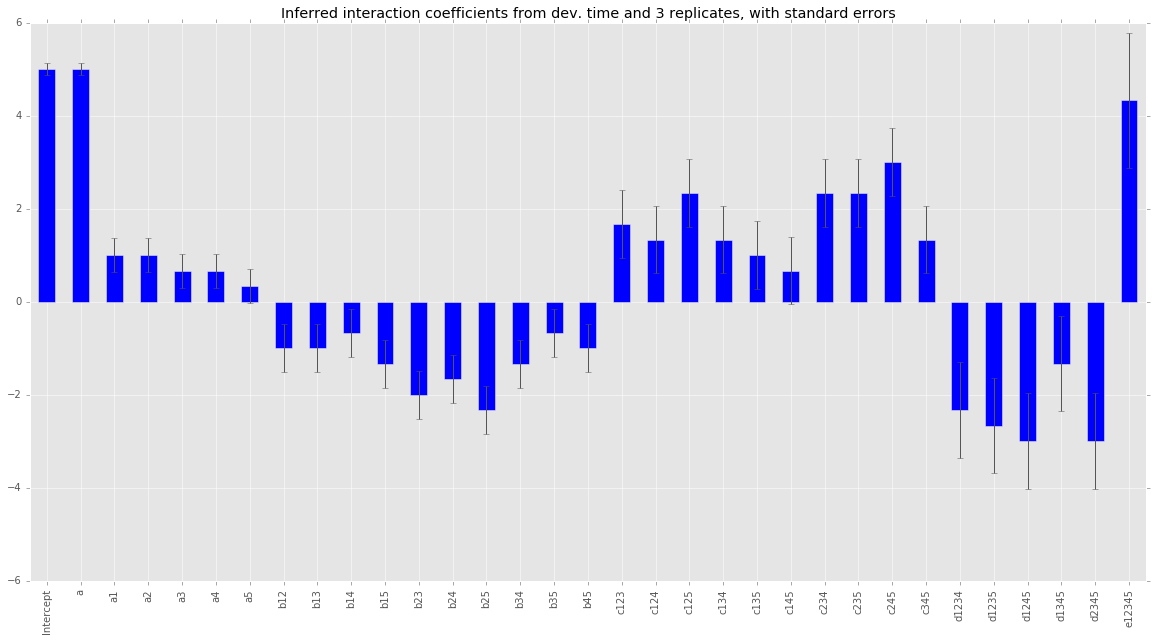

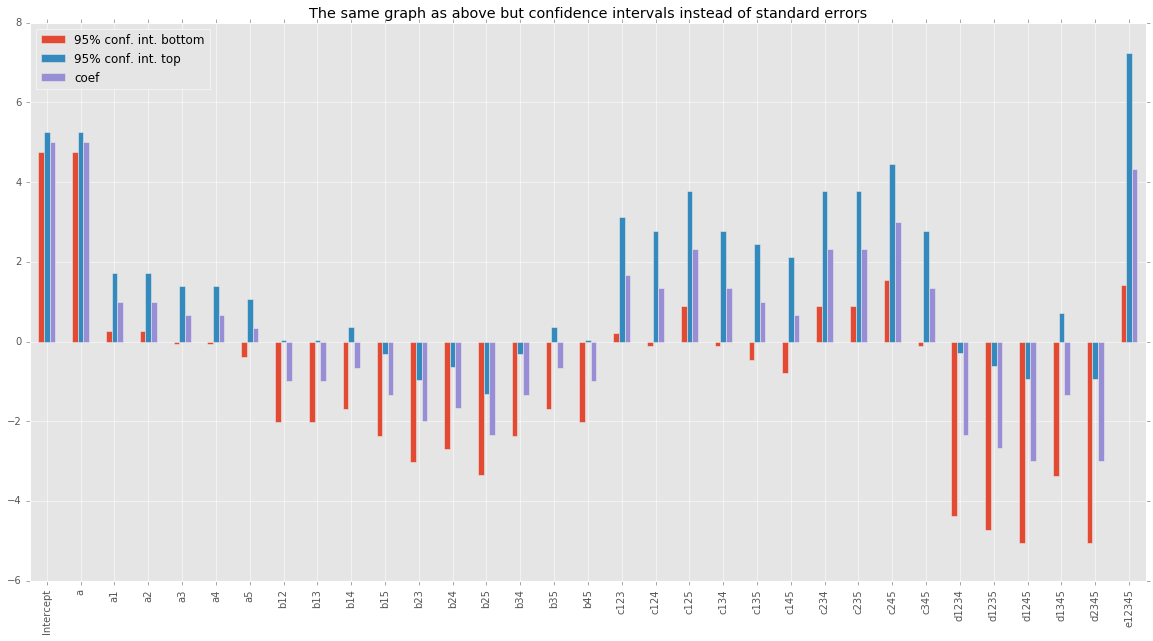

In [5]:
conf_int_devtime_3_reps = pd.DataFrame(lm_3_reps.conf_int())
conf_int_devtime_3_reps[2] = [lm_3_reps.params.a,
                              lm_3_reps.params.a,
                              lm_3_reps.params.a1,
                              lm_3_reps.params.a2,
                              lm_3_reps.params.a3,
                              lm_3_reps.params.a4,
                              lm_3_reps.params.a5,
                              lm_3_reps.params.b12,
                              lm_3_reps.params.b13,
                              lm_3_reps.params.b14,
                              lm_3_reps.params.b15,
                              lm_3_reps.params.b23,
                              lm_3_reps.params.b24,
                              lm_3_reps.params.b25,
                              lm_3_reps.params.b34,
                              lm_3_reps.params.b35,
                              lm_3_reps.params.b45,
                              lm_3_reps.params.c123,
                              lm_3_reps.params.c124,
                              lm_3_reps.params.c125,
                              lm_3_reps.params.c134,
                              lm_3_reps.params.c135,
                              lm_3_reps.params.c145,
                              lm_3_reps.params.c234,
                              lm_3_reps.params.c235,
                              lm_3_reps.params.c245,
                              lm_3_reps.params.c345,
                              lm_3_reps.params.d1234,
                              lm_3_reps.params.d1235,
                              lm_3_reps.params.d1245,
                              lm_3_reps.params.d1345,
                              lm_3_reps.params.d2345,
                              lm_3_reps.params.e12345]
conf_int_devtime_3_reps.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime_3_reps["coef"].plot.bar(yerr=lm_3_reps.bse, figsize=(20,10), color="b",
                                  title="Inferred interaction coefficients from dev. time and 3 replicates, "
                                         "with standard errors")
plt.savefig("3_reps_dev_time_std_err_as_range.pdf")
conf_int_devtime_3_reps.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("3_reps_dev_time_conf_int_as_bars.pdf")

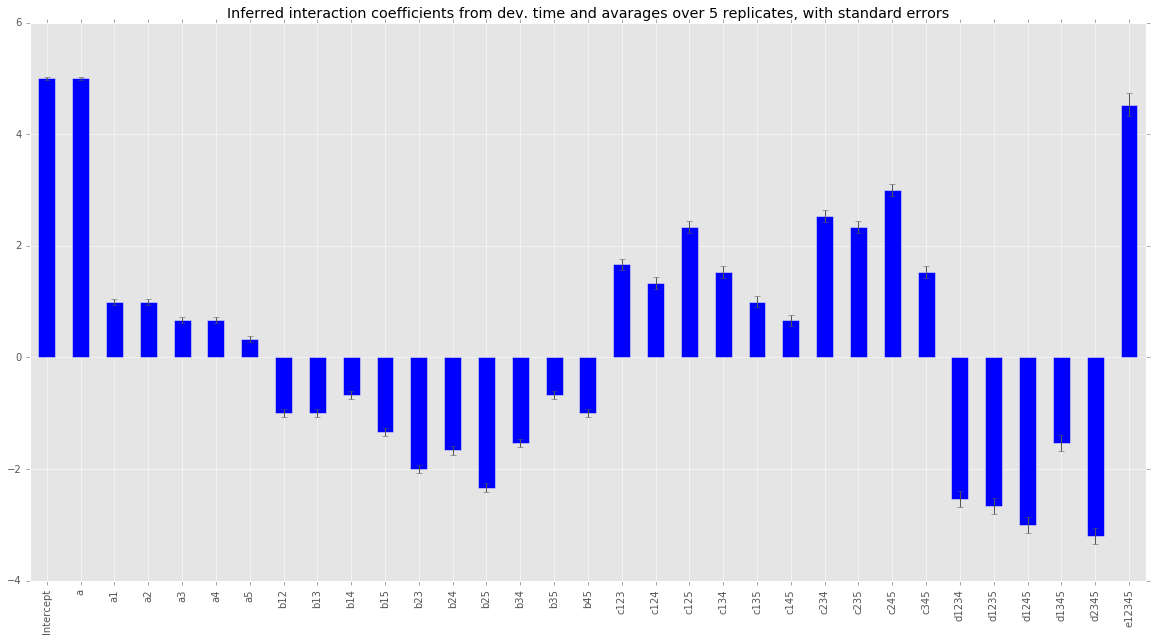

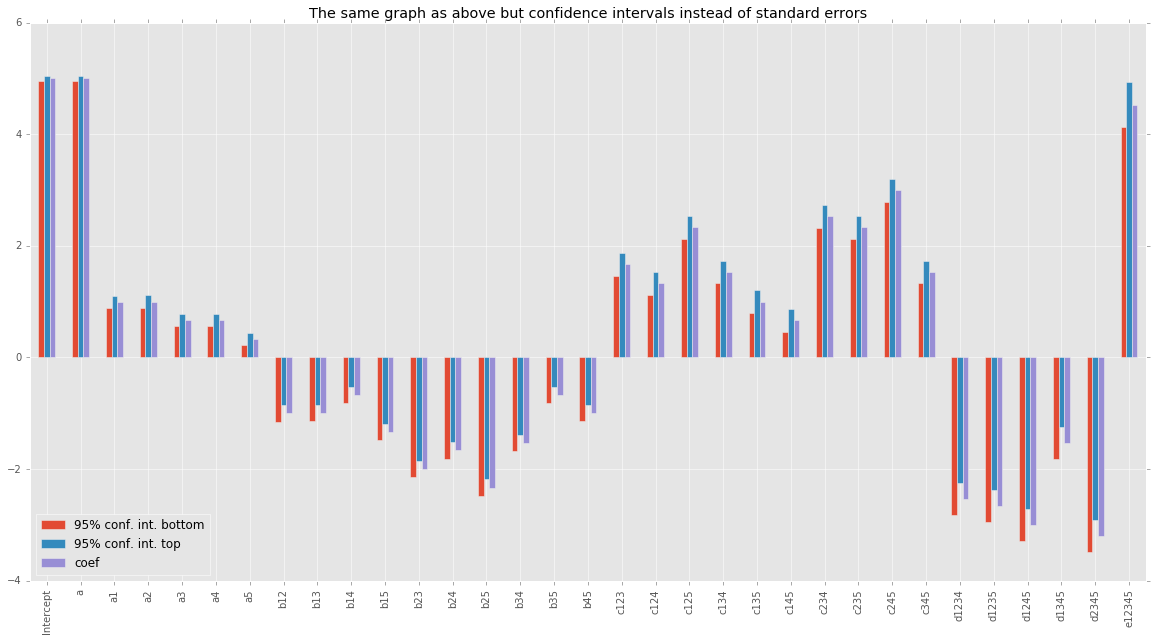

In [6]:
conf_int_devtime = pd.DataFrame(lm_devtime.conf_int())
conf_int_devtime[2] = [lm_devtime.params.a,
                       lm_devtime.params.a,
                       lm_devtime.params.a1,
                       lm_devtime.params.a2,
                       lm_devtime.params.a3,
                       lm_devtime.params.a4,
                       lm_devtime.params.a5,
                       lm_devtime.params.b12,
                       lm_devtime.params.b13,
                       lm_devtime.params.b14,
                       lm_devtime.params.b15,
                       lm_devtime.params.b23,
                       lm_devtime.params.b24,
                       lm_devtime.params.b25,
                       lm_devtime.params.b34,
                       lm_devtime.params.b35,
                       lm_devtime.params.b45,
                       lm_devtime.params.c123,
                       lm_devtime.params.c124,
                       lm_devtime.params.c125,
                       lm_devtime.params.c134,
                       lm_devtime.params.c135,
                       lm_devtime.params.c145,
                       lm_devtime.params.c234,
                       lm_devtime.params.c235,
                       lm_devtime.params.c245,
                       lm_devtime.params.c345,
                       lm_devtime.params.d1234,
                       lm_devtime.params.d1235,
                       lm_devtime.params.d1245,
                       lm_devtime.params.d1345,
                       lm_devtime.params.d2345,
                       lm_devtime.params.e12345]
conf_int_devtime.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime["coef"].plot.bar(yerr=lm_devtime.bse, figsize=(20,10), color="b",
                                  title="Inferred interaction coefficients from dev. time and "
                                          "avarages over 5 replicates, with standard errors")
plt.savefig("dev_time_std_err_as_range.pdf")
conf_int_devtime.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("dev_time_conf_int_as_bars.pdf")

- Jitter the 3 replicate dev. time data to add more variance:

In [7]:
data_jitter = data_3.copy()
data_jitter.development = data_jitter.development.astype(float)
for index, row in data_jitter.iterrows():
    if 8.9 < row["development"] and row["development"] < 9.1:
        data_jitter.set_value(index, "development", np.random.uniform(26/3, 9))
    elif 9.3 < row["development"] < 9.4:
        data_jitter.set_value(index, "development", np.random.uniform(9, 28/3))
    elif 9.6 < row["development"] < 9.7:
        data_jitter.set_value(index, "development", np.random.uniform(28/3, 29/3))
    elif 9.9 < row["development"] < 10.1:
        data_jitter.set_value(index, "development", np.random.uniform(29/3, 10))
    elif 10.3 < row["development"] < 10.4:
        data_jitter.set_value(index, "development", np.random.uniform(10, 31/3))
    elif 10.6 < row["development"] < 10.7:
        data_jitter.set_value(index, "development", np.random.uniform(31/3, 32/3))
    elif 10.9 < row["development"] < 11.1:
        data_jitter.set_value(index, "development", np.random.uniform(32/3, 11))
    else:
        print("Some data doesn't fit sampling intervals! Quitting.")
        sys.exit()

- Fit the model and plot the results for jittered data:

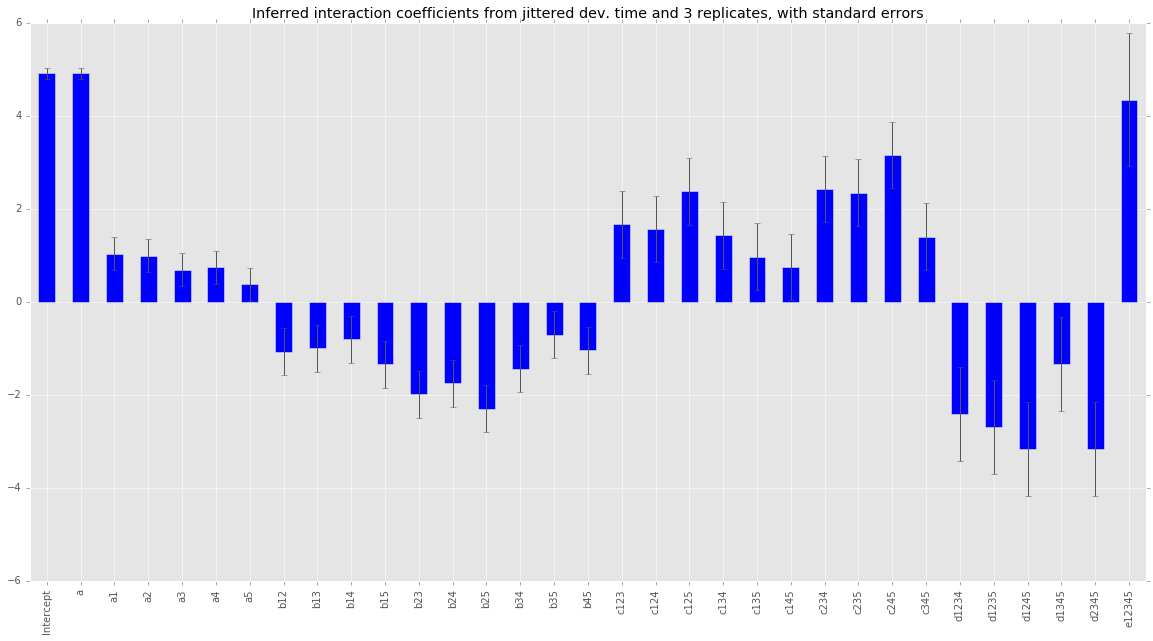

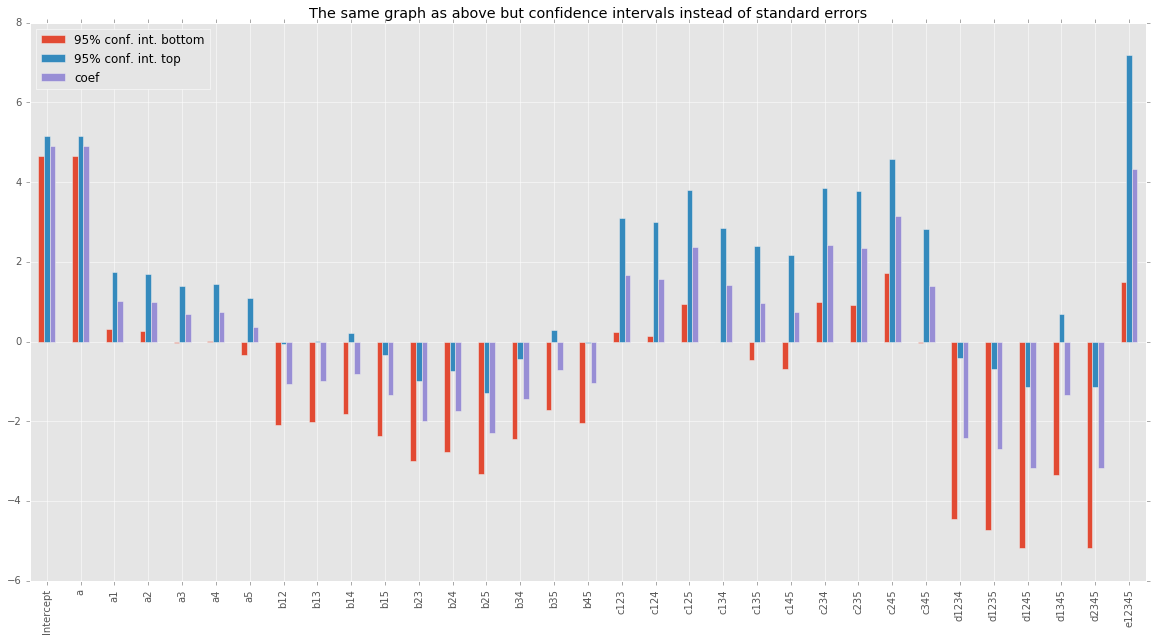

In [8]:
lm_devtime_jitter = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                            "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                            "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                            "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_jitter).fit()
conf_int_devtime_jitter = pd.DataFrame(lm_devtime_jitter.conf_int())
conf_int_devtime_jitter[2] = [lm_devtime_jitter.params.a,
                              lm_devtime_jitter.params.a,
                              lm_devtime_jitter.params.a1,
                              lm_devtime_jitter.params.a2,
                              lm_devtime_jitter.params.a3,
                              lm_devtime_jitter.params.a4,
                              lm_devtime_jitter.params.a5,
                              lm_devtime_jitter.params.b12,
                              lm_devtime_jitter.params.b13,
                              lm_devtime_jitter.params.b14,
                              lm_devtime_jitter.params.b15,
                              lm_devtime_jitter.params.b23,
                              lm_devtime_jitter.params.b24,
                              lm_devtime_jitter.params.b25,
                              lm_devtime_jitter.params.b34,
                              lm_devtime_jitter.params.b35,
                              lm_devtime_jitter.params.b45,
                              lm_devtime_jitter.params.c123,
                              lm_devtime_jitter.params.c124,
                              lm_devtime_jitter.params.c125,
                              lm_devtime_jitter.params.c134,
                              lm_devtime_jitter.params.c135,
                              lm_devtime_jitter.params.c145,
                              lm_devtime_jitter.params.c234,
                              lm_devtime_jitter.params.c235,
                              lm_devtime_jitter.params.c245,
                              lm_devtime_jitter.params.c345,
                              lm_devtime_jitter.params.d1234,
                              lm_devtime_jitter.params.d1235,
                              lm_devtime_jitter.params.d1245,
                              lm_devtime_jitter.params.d1345,
                              lm_devtime_jitter.params.d2345,
                              lm_devtime_jitter.params.e12345]
conf_int_devtime_jitter.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime_jitter["coef"].plot.bar(yerr=lm_devtime_jitter.bse, figsize=(20,10), color="b",
                                         title="Inferred interaction coefficients from jittered dev. time "
                                                "and 3 replicates, with standard errors")
plt.savefig("dev_time_jitter_std_err_as_range.pdf")
conf_int_devtime_jitter.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("dev_time_jitter_conf_int_as_bars.pdf")

- Output summary stats for jittered data:

In [9]:
lm_devtime_jitter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4.364
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           3.19e-07
Time:                        16:12:08   Log-Likelihood:                -37.443
No. Observations:                  96   AIC:                             138.9
Df Residuals:                      64   BIC:                             220.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.9082      0.126     38.844      0.000         4.656     5.161
a              4.9082      0.126     38.844      0.000         4.656     5.161
a1             1.0287      0.357      2.878      0.005         0.315     1.743
a2             0.9895      0.357      2.769      0.007         0.275     1.703
a3             0.6862      0.357      1.920      0.059        -0.028     1.400
a4             0.7368      0.357      2.062      0.043         0.023     1.451
a5             0.3757      0.357      1.051      0.297        -0.338     1.090
b12           -1.0778      0.505     -2.133      0.037        -2.088    -0.068
b13           -1.0027      0.505     -1.984      0.052        -2.012     0.007
b14           -0.8050      0.505     -1.593      0.116        -1.815     0.205
b15           -1.3508      0.505     -2.673      0.010        -2.361    -0.341
b23           -1.9952      0.505     -3.947      0.000        -3.005    -0.985
b24           -1.7515      0.505     -3.465      0.001        -2.761    -0.742
b25           -2.3026      0.505     -4.556      0.000        -3.312    -1.293
b34           -1.4411      0.505     -2.851      0.006        -2.451    -0.431
b35           -0.7120      0.505     -1.409      0.164        -1.722     0.298
b45           -1.0457      0.505     -2.069      0.043        -2.055    -0.036
c123           1.6620      0.715      2.325      0.023         0.234     3.090
c124           1.5598      0.715      2.182      0.033         0.132     2.988
c125           2.3744      0.715      3.322      0.001         0.946     3.802
c134           1.4265      0.715      1.996      0.050        -0.001     2.854
c135           0.9670      0.715      1.353      0.181        -0.461     2.395
c145           0.7455      0.715      1.043      0.301        -0.682     2.173
c234           2.4242      0.715      3.391      0.001         0.996     3.852
c235           2.3462      0.715      3.282      0.002         0.918     3.774
c245           3.1518      0.715      4.409      0.000         1.724     4.580
c345           1.3977      0.715      1.955      0.055        -0.030     2.826
d1234         -2.4249      1.011     -2.399      0.019        -4.444    -0.405
d1235         -2.6971      1.011     -2.668      0.010        -4.717    -0.678
d1245         -3.1610      1.011     -3.127      0.003        -5.180    -1.142
d1345         -1.3411      1.011     -1.327      0.189        -3.361     0.678
d2345         -3.1717      1.011     -3.138      0.003        -5.191    -1.152
e12345         4.3407      1.430      3.036      0.003         1.485     7.197
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.518
Sk

- Plot parameters inferred from fitness:

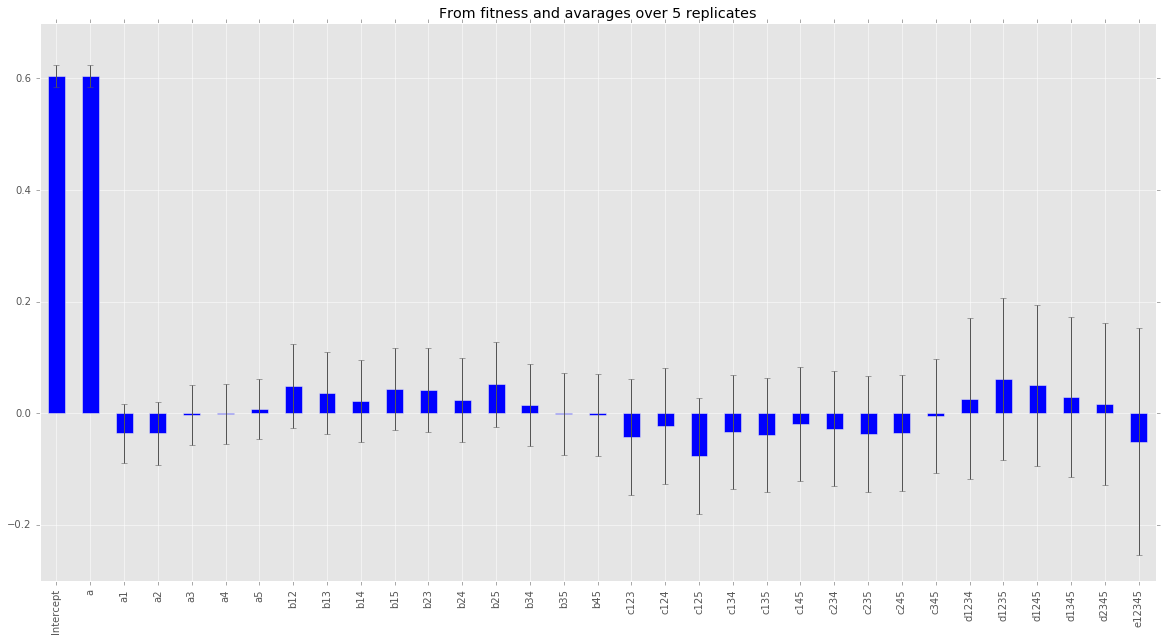

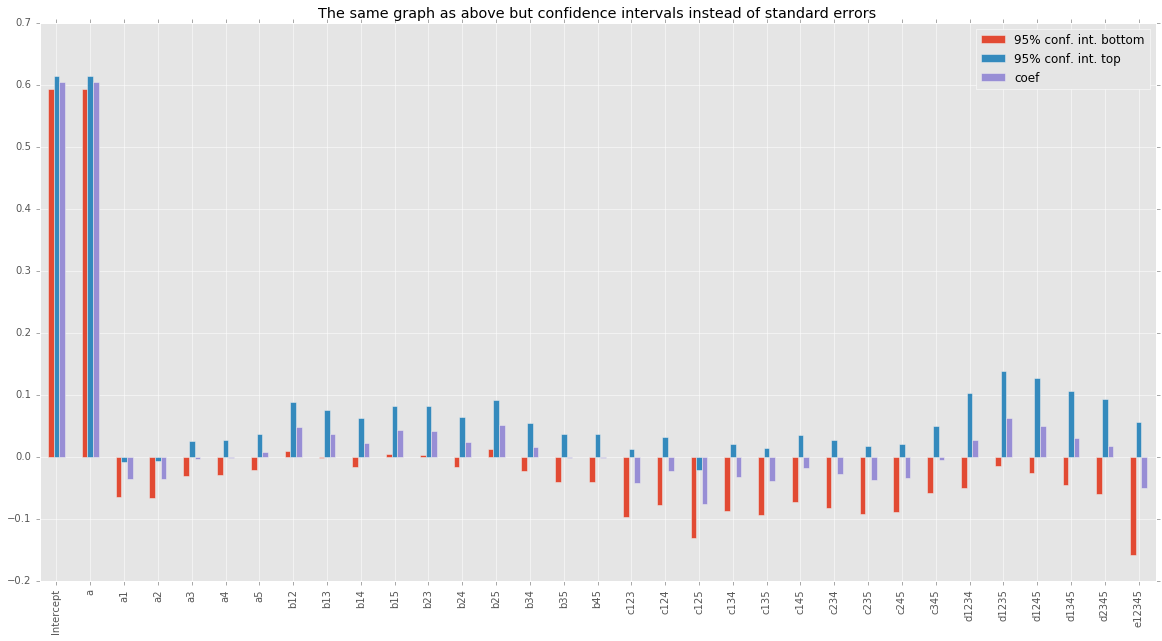

In [10]:
conf_int_fitness = pd.DataFrame(lm_fitness.conf_int())
conf_int_fitness[2] = [lm_fitness.params.a,
                       lm_fitness.params.a,
                       lm_fitness.params.a1,
                       lm_fitness.params.a2,
                       lm_fitness.params.a3,
                       lm_fitness.params.a4,
                       lm_fitness.params.a5,
                       lm_fitness.params.b12,
                       lm_fitness.params.b13,
                       lm_fitness.params.b14,
                       lm_fitness.params.b15,
                       lm_fitness.params.b23,
                       lm_fitness.params.b24,
                       lm_fitness.params.b25,
                       lm_fitness.params.b34,
                       lm_fitness.params.b35,
                       lm_fitness.params.b45,
                       lm_fitness.params.c123,
                       lm_fitness.params.c124,
                       lm_fitness.params.c125,
                       lm_fitness.params.c134,
                       lm_fitness.params.c135,
                       lm_fitness.params.c145,
                       lm_fitness.params.c234,
                       lm_fitness.params.c235,
                       lm_fitness.params.c245,
                       lm_fitness.params.c345,
                       lm_fitness.params.d1234,
                       lm_fitness.params.d1235,
                       lm_fitness.params.d1245,
                       lm_fitness.params.d1345,
                       lm_fitness.params.d2345,
                       lm_fitness.params.e12345]
conf_int_fitness.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_fitness["coef"].plot.bar(yerr=lm_devtime.bse, figsize=(20,10), color="b",
                                  title="From fitness and avarages over 5 replicates")
plt.savefig("fitness_std_err_as_range.pdf")
conf_int_fitness.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("fitness_conf_int_as_bars.pdf")